# Resumo

### Capítulo 1: Análise Exploratória e Estatística
- 1.1: Importar Dados e Realizar Primeira Visualização
- 1.2: Verificar Valores Nulos
- 1.3: Verificar Valores Únicos
- 1.4: Realizar Análise Gráfica

### Capítulo 2: Preparação de Dados
- 2.1: Tratar Valores Ausentes
- 2.2: Tratar Outlier
- 2.3: Corrigir Tipos de Dados Incorretos
- 2.4: Aplicar Codificação One Hot
- 2.5: Correlação
- 2.6: Dividir Dados
- 2.7: Realizar Standard Scaler
- 2.8: Aplicar Undersampler
- 2.9: Utilizar SMOTE

### Capítulo 3: Construção e Teste de Modelos de Aprendizado de Máquina
- 3.1: Regressão Logística
- 3.2: Random Forest
- 3.3: Gradient Boosting
- 3.4: Máquina de Vetores de Suporte (SVM)
- 3.5: K-Nearest Neighbors (KNN)
- 3.6: Redes Neurais

### Capítulo 4: Conclusão

# Etapa 1: Análise Exploratória de Dados

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### 1.1: Importar Dados e Realizar Primeira Visualização

In [227]:
credit_df = pd.read_csv("credit_risk_dataset.csv")

credit_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


- person_age: Idade
- person_income: Renda Anual
- person_home_ownership: Propriedade da Residência
- person_emp_length: Tempo de Emprego (em anos)
- loan_intent: Intenção do Empréstimo
- loan_grade: Grau do Empréstimo
- loan_amnt: Valor do Empréstimo
- loan_int_rate: Taxa de Juros
- loan_status: Essa é nossa classe alvo. 0 para empréstimo negado, 1 para empréstimo aprovado.
- loan_percent_income: Percentual da Renda Envolvida no Empréstimo.
- cb_person_default_on_file: Histórico de Inadimplência do Cliente
- cb_preson_cred_hist_length: Tempo de Histórico de Crédito do Cliente

In [228]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [229]:
credit_df.describe() 

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### 1.2: Verificar Valores Nulos

Vamos usar os métodos 'isnull' e 'sum' para somar os valores nulos em cada coluna.

In [230]:
credit_df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### 1.3: Verificar Valores Únicos

In [231]:
colunas_binarias_verificar = ['loan_status', 'cb_person_default_on_file']

for coluna in colunas_binarias_verificar:
    valores_unicos = credit_df[coluna].unique()
    print(f"Valores únicos na coluna'{coluna}':'{valores_unicos}'")

Valores únicos na coluna'loan_status':'[1 0]'
Valores únicos na coluna'cb_person_default_on_file':'['Y' 'N']'


In [232]:
colunas_verificar = ['person_home_ownership', 'loan_intent','loan_grade']

for coluna in colunas_verificar:
    valores_unicos = credit_df[coluna].unique()
    print(f"Valores únicos na coluna'{coluna}':'{valores_unicos}'")

Valores únicos na coluna'person_home_ownership':'['RENT' 'OWN' 'MORTGAGE' 'OTHER']'
Valores únicos na coluna'loan_intent':'['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']'
Valores únicos na coluna'loan_grade':'['D' 'B' 'C' 'A' 'E' 'F' 'G']'


### 1.4: Realizar Análise Gráfica

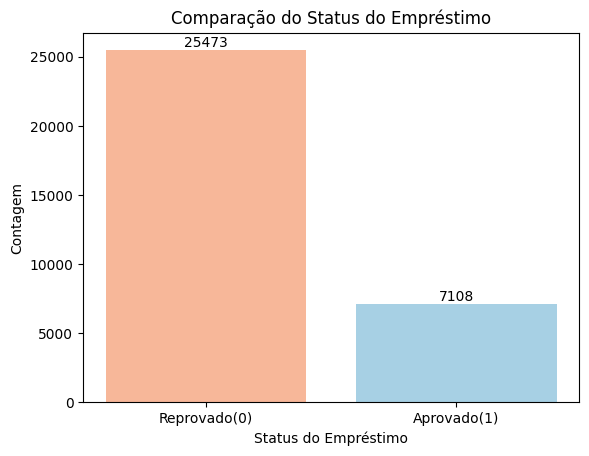

In [233]:
# Definindo uma paleta de cores usando a função color_palette() do seaborn
colors = sns.color_palette("RdBu", n_colors=2)

# Contagem de entradas com valor 0 e 1
count_0 = credit_df['loan_status'].value_counts()[0]
count_1 = credit_df['loan_status'].value_counts()[1]

# Criando o gráfico de barras com cores
plt.bar(['Reprovado(0)', 'Aprovado(1)'], [count_0, count_1], color=colors)

# Adicionando rótulos e título
plt.title('Comparação do Status do Empréstimo')
plt.xlabel('Status do Empréstimo')
plt.ylabel('Contagem')

# Adicionando contagens acima das barras
for i, count in enumerate([count_0, count_1]):
    plt.text(i, count, str(count), ha='center', va='bottom')

# # Salvar o gráfico como um arquivo de imagem (por exemplo, PNG)
# plt.savefig('status_emprestimo_plot.png', bbox_inches='tight')

# Exibindo o gráfico
plt.show()

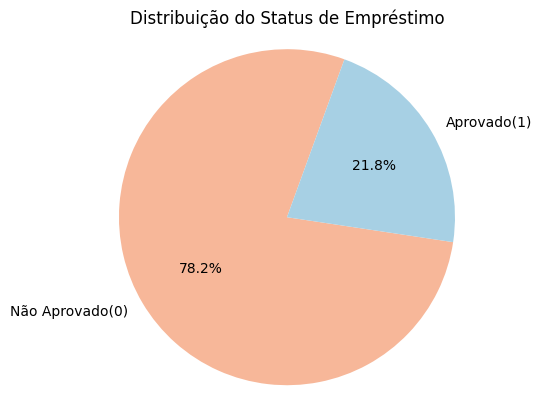

In [234]:
# Calculando a porcentagem de entradas com valor 0 e 1
porcentagem_0 = (count_0 / len(credit_df)) * 100
porcentagem_1 = (count_1 / len(credit_df)) * 100

# Criando o gráfico de pizza
labels = ['Não Aprovado(0)', 'Aprovado(1)']
sizes = [porcentagem_0, porcentagem_1]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=70, colors=colors)

# Adicionando um título
plt.title('Distribuição do Status de Empréstimo')

# Exibindo o gráfico
plt.axis('equal')  # A proporção igual garante que a pizza seja desenhada como um círculo.

# # Salvar o gráfico como um arquivo de imagem (por exemplo, PNG)
# plt.savefig('emprestimo_distribuicao_plot.png', bbox_inches='tight')

plt.show()

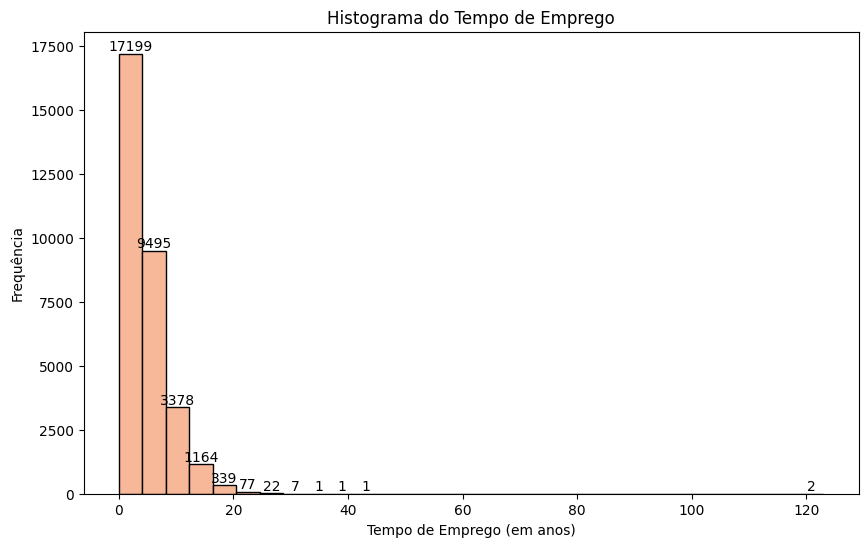

In [235]:
# Criando o histograma
plt.figure(figsize=(10, 6))
n, bins, _ = plt.hist(credit_df['person_emp_length'].dropna(), bins=30, edgecolor='black', color=colors[0])  # Usando a primeira cor da paleta

# Adicionando números específicos sobre as barras
for count, value in zip(n, bins[:-1]):
    if count > 0:
        plt.text(value + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

# Definindo o título e rótulos dos eixos
plt.title('Histograma do Tempo de Emprego')
plt.xlabel('Tempo de Emprego (em anos)')
plt.ylabel('Frequência')

# # Salvar o gráfico como um arquivo de imagem (por exemplo, PNG)
# plt.savefig('tempo_emprego_plot.png', bbox_inches='tight')

# Exibindo o histograma
plt.show()

# Etapa 2: Preparação de Dados

In [236]:
credit_df_clean = credit_df.copy()

### 2.1: Tratar Valores Ausentes

In [237]:
# Criar uma função para substituir valores nulos pelo valor médio de uma coluna específica.
def tratar_valores_ausentes(dataframe, coluna):
    valor_mediana = dataframe[coluna].median()
    dataframe[coluna] = dataframe[coluna].fillna(valor_mediana)

In [238]:
# Usando a função para substituir os valores nulos em 'person_emp_length'.
tratar_valores_ausentes(credit_df_clean, 'person_emp_length')
 
# Verificar se as substituições foram bem-sucedidas:
credit_df_clean.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [239]:
# Usando a função para substituir os valores em branco em 'loan_int_rate'.
tratar_valores_ausentes(credit_df_clean, 'loan_int_rate')

# Verificar se ainda existem valores em branco:
credit_df_clean.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### 2.2: Tratar Outlier

In [240]:
def tratar_outlier_acima_de(dataframe, coluna, valor_maximo):
    """
    Substitui os valores acima de um determinado valor máximo pela mediana da coluna.
    
    Parameters:
    dataframe (pd.DataFrame): O DataFrame onde a substituição será realizada.
    column_name (str): O nome da coluna onde os valores serão substituídos.
    max_value (numeric): O valor máximo acima do qual os valores serão substituídos.
    
    Returns:
    None: A função modifica o DataFrame in-place.
    """
    # Calcular a mediana da coluna
    valor_mediana = dataframe[coluna].median()
    
    # Substituir os valores acima do max_value pela mediana
    dataframe.loc[dataframe[coluna] > valor_maximo, coluna] = valor_mediana

In [241]:
# Usando a função para substituir valores maiores que 120 em 'person_emp_length'.
tratar_outlier_acima_de(credit_df_clean, 'person_emp_length', 120)

# Verificar se os valores foram removidos corretamente
# Aqui vamos verificar o valor máximo desta coluna.
credit_df_clean['person_emp_length'].max()

np.float64(41.0)

### 2.3: Corrigir Tipos de Dados Incorretos

In [242]:
def transform_values(dataframe, column_name, value_mapping):
    dataframe[column_name] = dataframe[column_name].map(value_mapping)

In [243]:
# Usando a função para transformar 'Y' em True e 'N' em False em 'cb_person_default_on_file'.
transform_values(credit_df_clean, 'cb_person_default_on_file', {'Y': True, 'N': False})

# Verificando se a transformação foi aplicada corretamente.
credit_df_clean['cb_person_default_on_file'].unique()

array([ True, False])

In [244]:
credit_df_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,4.0,PERSONAL,D,35000,16.02,1,0.59,True,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,False,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,False,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,False,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,True,4


### 2.4: Aplicar Codificação One Hot

In [245]:
# Aplicando codificação one-hot
credit_df_clean = pd.get_dummies(credit_df_clean, columns=colunas_verificar)

In [246]:
# Converter colunas booleanas para inteiros (0 e 1)
colunas_bool = credit_df_clean.select_dtypes(include='bool').columns
credit_df_clean[colunas_bool] = credit_df_clean[colunas_bool].astype(int)

credit_df_clean.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,4.0,35000,16.02,1,0.59,1,3,0,...,0,1,0,0,0,0,1,0,0,0
1,21,9600,5.0,1000,11.14,0,0.10,0,2,0,...,0,0,0,0,1,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,0,3,1,...,1,0,0,0,0,1,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,0,2,0,...,1,0,0,0,0,1,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,1,4,0,...,1,0,0,0,0,1,0,0,0,0


### 2.5: Correlação

In [247]:
# Supondo que 'loan_status' já esteja numérico (0 para adimplente, 1 para inadimplente)
correlation_matrix = credit_df_clean.corr()
correlations = correlation_matrix["loan_status"].abs().sort_values(ascending=False)

# Exibir as maiores correlações com loan_status
print(correlations)

loan_status                       1.000000
loan_percent_income               0.379366
loan_int_rate                     0.319360
loan_grade_D                      0.318998
person_home_ownership_RENT        0.238430
loan_grade_A                      0.201891
person_home_ownership_MORTGAGE    0.187637
loan_grade_E                      0.180122
cb_person_default_on_file         0.179141
person_income                     0.144449
loan_amnt                         0.105376
person_home_ownership_OWN         0.101960
loan_grade_F                      0.101841
loan_grade_B                      0.092190
person_emp_length                 0.085630
loan_grade_G                      0.082306
loan_intent_VENTURE               0.078274
loan_intent_DEBTCONSOLIDATION     0.071550
loan_intent_MEDICAL               0.056595
loan_intent_EDUCATION             0.055348
loan_intent_HOMEIMPROVEMENT       0.036607
person_age                        0.021629
loan_intent_PERSONAL              0.021094
cb_person_c

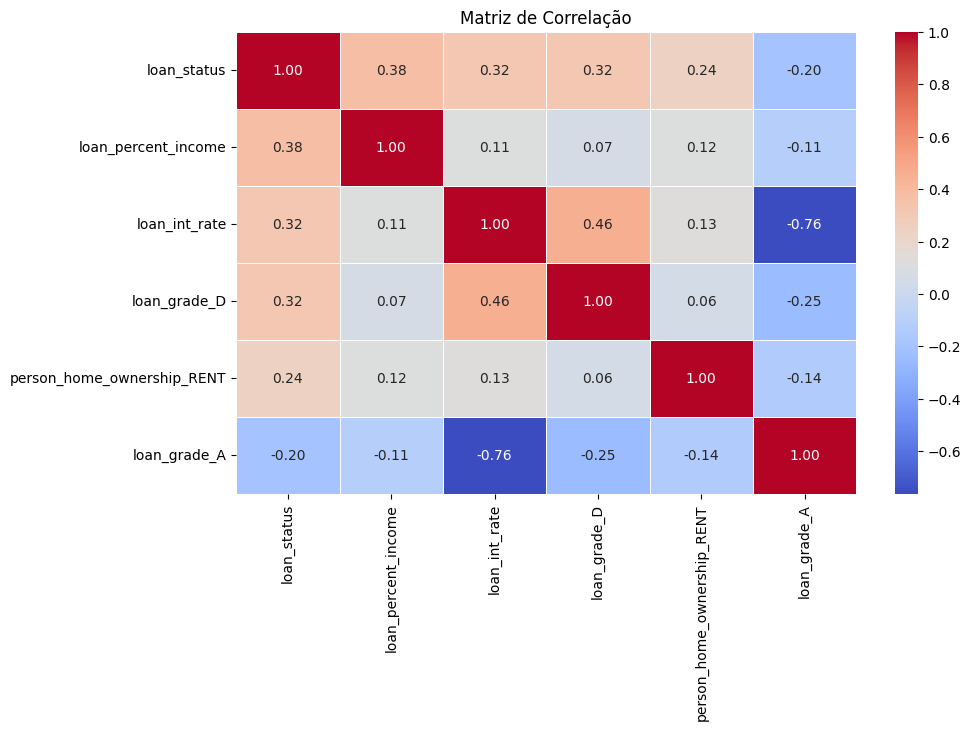

In [276]:
# Selecionar apenas as colunas com correlação acima de um certo limiar (ex: 0.1)
high_corr_features = correlations[correlations > 0.2].index
filtered_corr_matrix = correlation_matrix.loc[high_corr_features, high_corr_features]

# Plotar a matriz de correlação filtrada
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação")

# # Salvar o gráfico como um arquivo de imagem (por exemplo, PNG)
# plt.savefig('Matriz_Correlação.png', bbox_inches='tight')

plt.show()

### 2.6: Dividir Dados

In [249]:
from sklearn.model_selection import train_test_split

# Extraindo as características (X) e o alvo (y) do DataFrame
X = credit_df_clean.drop(columns=['loan_status'])
y = credit_df_clean['loan_status']

# Dividindo os dados em conjuntos de treino e teste com estratificação
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # Splitting again to obtain the validation set

# Exibindo as dimensões dos conjuntos de dados resultantes
print("Forma do conjunto de treino:", X_train.shape, y_train.shape)
print("Forma do conjunto de validação:", X_val.shape, y_val.shape)
print("Forma do conjunto de teste:", X_test.shape, y_test.shape)

Forma do conjunto de treino: (19548, 25) (19548,)
Forma do conjunto de validação: (6516, 25) (6516,)
Forma do conjunto de teste: (6517, 25) (6517,)


### 2.7: Realizar Standard Scaler

In [250]:
from sklearn.preprocessing import StandardScaler

# Criar o objeto StandardScaler
scaler = StandardScaler()

# Ajustar o scaler apenas ao conjunto de treinamento
X_train = scaler.fit_transform(X_train)

# Transformar os conjuntos de validação e teste
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train

array([[-0.89819344,  0.22797028,  0.06152376, ..., -0.17439852,
        -0.08704556, -0.04235181],
       [-0.58412698, -0.45591566, -0.93819905, ..., -0.17439852,
        -0.08704556, -0.04235181],
       [-0.74116021, -0.55428158, -0.18840694, ..., -0.17439852,
        -0.08704556, -0.04235181],
       ...,
       [-0.42709375, -0.35647077,  1.06124658, ..., -0.17439852,
        -0.08704556, -0.04235181],
       [ 1.30027178, -0.55128445,  1.06124658, ..., -0.17439852,
        -0.08704556, -0.04235181],
       [ 0.3580724 , -0.47566677, -0.68826835, ..., -0.17439852,
        -0.08704556, -0.04235181]], shape=(19548, 25))

### 2.8: Aplicar Undersampler

In [251]:
from imblearn.under_sampling import RandomUnderSampler

# Criar o amostrador para undersampling
undersampler = RandomUnderSampler(random_state=42)

# Aplicar undersampling apenas ao conjunto de treinamento
X_train_us, y_train_us = undersampler.fit_resample(X_train, y_train)

print("Forma do conjunto de treinamento após undersampling:", X_train_us.shape, y_train_us.shape)

Forma do conjunto de treinamento após undersampling: (8554, 25) (8554,)


### 2.9: Utilizar SMOTE

In [252]:
from imblearn.over_sampling import SMOTE

# Aplicar o SMOTE apenas no conjunto de treinamento para lidar com o desequilíbrio de classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Forma do conjunto de treinamento com SMOTE:", X_train_smote.shape, y_train_smote.shape)

Forma do conjunto de treinamento com SMOTE: (30542, 25) (30542,)


In [253]:
# Contando as ocorrências de cada classe nos conjuntos de treinamento, validação e teste
pd.Series(y_train_smote).value_counts()

loan_status
0    15271
1    15271
Name: count, dtype: int64

# Etapa 3: Construção de Modelos de Machine Learning

### 3.1: Regressão Logística

- Padrão

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Instanciar o modelo de regressão logística
logistic_model = LogisticRegression(random_state=42)

# Treinar o modelo de regressão logística
logistic_model.fit(X_train, y_train)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.88      0.95      0.92      5107
    Approved       0.77      0.55      0.64      1409

    accuracy                           0.87      6516
   macro avg       0.83      0.75      0.78      6516
weighted avg       0.86      0.87      0.86      6516



- Undersampling

In [255]:
# Treinar o modelo de regressão logística
logistic_model.fit(X_train_us, y_train_us)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.82      0.87      5107
    Approved       0.54      0.78      0.64      1409

    accuracy                           0.81      6516
   macro avg       0.74      0.80      0.76      6516
weighted avg       0.85      0.81      0.82      6516



- SMOTE

In [256]:
# Treinar o modelo de regressão logística
logistic_model.fit(X_train_smote, y_train_smote)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, logistic_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.82      0.87      5107
    Approved       0.54      0.78      0.64      1409

    accuracy                           0.81      6516
   macro avg       0.74      0.80      0.76      6516
weighted avg       0.85      0.81      0.82      6516



### 3.2: Random Forest

- Padrão

In [257]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar o modelo Random Forest.
rf_model = RandomForestClassifier(random_state=42)

# Treinar o modelo.
rf_model.fit(X_train, y_train)
# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, rf_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.92      0.99      0.96      5107
    Approved       0.97      0.70      0.81      1409

    accuracy                           0.93      6516
   macro avg       0.95      0.85      0.89      6516
weighted avg       0.93      0.93      0.93      6516



- Undersampling

In [258]:
# Train the Random Forest classifier 
rf_model.fit(X_train_us, y_train_us)

# Generate classification report for the original imbalanced validation set
print(classification_report(y_val, rf_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.94      0.92      0.93      5107
    Approved       0.73      0.79      0.76      1409

    accuracy                           0.89      6516
   macro avg       0.83      0.85      0.84      6516
weighted avg       0.89      0.89      0.89      6516



- SMOTE

In [259]:
# Treinar o classificador Random Forest
rf_model.fit(X_train_smote, y_train_smote)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, rf_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.98      0.95      5107
    Approved       0.91      0.72      0.81      1409

    accuracy                           0.93      6516
   macro avg       0.92      0.85      0.88      6516
weighted avg       0.92      0.93      0.92      6516



### 3.3: Gradient Boosting

In [260]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Inicializar o modelo Gradient Boosting.
gb_model = GradientBoostingClassifier(random_state=42)

In [261]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Definir os parâmetros a serem ajustados
# param_grid_gb = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'subsample': [0.8, 0.9, 1.0]
# }

# # Inicializar o modelo de Gradient Boosting
# gb_model = GradientBoostingClassifier(random_state=42)

# # Criar o objeto GridSearchCV
# grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# # Realizar a busca em grade nos dados de treinamento
# grid_search_gb.fit(X_train, y_train)

# # Melhores parâmetros encontrados
# best_params_gb = grid_search_gb.best_params_

# # Treinar o modelo com os melhores parâmetros
# best_model_gb = grid_search_gb.best_estimator_
# best_model_gb.fit(X_train, y_train)

# # Fazer previsões no conjunto de teste
# y_pred_gb = best_model_gb.predict(X_test)

# # Avaliar o desempenho do modelo
# accuracy_gb = accuracy_score(y_test, y_pred_gb)
# conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
# classification_rep_gb = classification_report(y_test, y_pred_gb)

# # Exibir métricas de desempenho e melhores parâmetros
# print(f'Melhores Parâmetros do Gradient Boosting: {best_params_gb}')
# print(f'Precisão do Gradient Boosting: {accuracy_gb:.4f}')
# print(f'Matriz de Confusão para Gradient Boosting:\n{conf_matrix_gb}')
# print(f'Relatório de Classificação para Gradient Boosting:\n{classification_rep_gb}')

- Padrão

In [262]:
# Inicializar o modelo Gradient Boosting.
gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=150, subsample=0.9, random_state=42)

# Treinar o modelo.
gb_model.fit(X_train, y_train)

# Gerar o relatório de classificação 
print(classification_report(y_val, gb_model.predict(X_val), target_names=['Não Aprovado', 'Aprovado']))

              precision    recall  f1-score   support

Não Aprovado       0.93      0.99      0.96      5107
    Aprovado       0.97      0.71      0.82      1409

    accuracy                           0.93      6516
   macro avg       0.95      0.85      0.89      6516
weighted avg       0.94      0.93      0.93      6516



- Undersampling

In [263]:
# Treinar o modelo.
gb_model.fit(X_train_us, y_train_us)

# Gerar o relatório de classificação 
print(classification_report(y_val, gb_model.predict(X_val), target_names=['Não Aprovado', 'Aprovado']))

              precision    recall  f1-score   support

Não Aprovado       0.95      0.93      0.94      5107
    Aprovado       0.76      0.82      0.78      1409

    accuracy                           0.90      6516
   macro avg       0.85      0.87      0.86      6516
weighted avg       0.91      0.90      0.90      6516



- SMOTE

In [264]:
# Treinar o modelo.
gb_model.fit(X_train_smote, y_train_smote)

# Gerar o relatório de classificação 
print(classification_report(y_val, gb_model.predict(X_val), target_names=['Não Aprovado', 'Aprovado']))

              precision    recall  f1-score   support

Não Aprovado       0.92      0.99      0.96      5107
    Aprovado       0.96      0.70      0.81      1409

    accuracy                           0.93      6516
   macro avg       0.94      0.85      0.88      6516
weighted avg       0.93      0.93      0.93      6516



### 3.4: Máquina de Vetores de Suporte (SVM)

In [265]:
from sklearn.svm import SVC

# Inicializar o modelo SVM.
svm_model = SVC(random_state=42)

# Treinar o modelo.
svm_model.fit(X_train, y_train)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, svm_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.91      0.99      0.94      5107
    Approved       0.93      0.63      0.75      1409

    accuracy                           0.91      6516
   macro avg       0.92      0.81      0.85      6516
weighted avg       0.91      0.91      0.90      6516



### 3.5: K-Nearest Neighbors (KNN)

In [266]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar o modelo KNN.
knn_model = KNeighborsClassifier(metric= 'manhattan', n_neighbors=9, weights='distance')

- Padrão

In [267]:
# Treinar o modelo.
knn_model.fit(X_train, y_train)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, knn_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.90      0.98      0.94      5107
    Approved       0.90      0.61      0.73      1409

    accuracy                           0.90      6516
   macro avg       0.90      0.80      0.83      6516
weighted avg       0.90      0.90      0.89      6516



In [268]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameters you want to test
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],  # test different values for the number of neighbors
#     'weights': ['uniform', 'distance'],  # test different weighting methods
#     'metric': ['euclidean', 'manhattan']  # test different distance metrics
# }

# # Initialize the KNN model
# knn_model = KNeighborsClassifier()

# # Initialize the grid search
# grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv=5)

# # Perform grid search on the training set
# grid_search.fit(X_train, y_train)

# # Get the best parameters found
# best_params = grid_search.best_params_

# # Train the model with the best parameters on the full training set
# best_knn_model = KNeighborsClassifier(**best_params)
# best_knn_model.fit(X_train, y_train)

# # Make predictions on the test set using the optimized model
# y_pred_best_knn = best_knn_model.predict(X_test)

# # Evaluate the performance of the optimized model
# accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
# conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)
# classification_rep_best_knn = classification_report(y_test, y_pred_best_knn)

# # Display performance metrics of the optimized model
# print(f'Best parameters found: {best_params}')
# print(f'Optimized KNN accuracy: {accuracy_best_knn:.4f}')
# print(f'Confusion Matrix for Optimized KNN:\n{conf_matrix_best_knn}')
# print(f'Classification Report for Optimized KNN:\n{classification_rep_best_knn}')

- Undersampling

In [269]:
# Treinar o modelo.
knn_model.fit(X_train_us, y_train_us)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, knn_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.86      0.89      5107
    Approved       0.59      0.76      0.67      1409

    accuracy                           0.84      6516
   macro avg       0.76      0.81      0.78      6516
weighted avg       0.86      0.84      0.84      6516



- SMOTE

In [270]:
# Treinar o modelo.
knn_model.fit(X_train_smote, y_train_smote)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, knn_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.85      0.89      5107
    Approved       0.59      0.76      0.66      1409

    accuracy                           0.83      6516
   macro avg       0.76      0.81      0.78      6516
weighted avg       0.85      0.83      0.84      6516



### 3.6: Redes Neurais

- Normal

In [271]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar o modelo Rede Neural.
mlp_model = MLPClassifier(max_iter=500, random_state=42)

# Treinar o modelo.
mlp_model.fit(X_train, y_train)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, mlp_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.92      0.97      0.95      5107
    Approved       0.88      0.69      0.78      1409

    accuracy                           0.91      6516
   macro avg       0.90      0.83      0.86      6516
weighted avg       0.91      0.91      0.91      6516



- Undersampling

In [272]:
# Treinar o modelo.
mlp_model.fit(X_train_us, y_train_us)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, mlp_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.94      0.88      0.91      5107
    Approved       0.65      0.79      0.71      1409

    accuracy                           0.86      6516
   macro avg       0.79      0.83      0.81      6516
weighted avg       0.87      0.86      0.87      6516



- SMOTE

In [273]:
# Treinar o modelo.
mlp_model.fit(X_train_smote, y_train_smote)

# Gerar o relatório de classificação para o conjunto de validação original desbalanceado
print(classification_report(y_val, mlp_model.predict(X_val), target_names=['Not Approved', 'Approved']))

              precision    recall  f1-score   support

Not Approved       0.93      0.91      0.92      5107
    Approved       0.70      0.74      0.72      1409

    accuracy                           0.88      6516
   macro avg       0.82      0.83      0.82      6516
weighted avg       0.88      0.88      0.88      6516



# Etapa 4: Teste de Modelos e Conclusão

In [274]:
# Treinar o modelo.
gb_model.fit(X_train, y_train)

# Gerar o relatório de classificação 
print(classification_report(y_test, gb_model.predict(X_test), target_names=['Não Aprovado', 'Aprovado']))

              precision    recall  f1-score   support

Não Aprovado       0.93      0.99      0.96      5095
    Aprovado       0.97      0.72      0.83      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.86      0.89      6517
weighted avg       0.94      0.93      0.93      6517



Após avaliar vários modelos, identificamos o modelo Gradient Boosting como o mais preciso na previsão dos resultados de aprovação de empréstimos. Este modelo demonstra desempenho superior em discernir situações onde os empréstimos são prováveis de serem aprovados ou negados. Suas capacidades preditivas robustas o tornam a melhor escolha para nosso framework de decisão de empréstimos.

In [275]:
# Treinar o modelo.
gb_model.fit(X_train_us, y_train_us)

# Gerar o relatório de classificação 
print(classification_report(y_test, gb_model.predict(X_test), target_names=['Não Aprovado', 'Aprovado']))

              precision    recall  f1-score   support

Não Aprovado       0.94      0.92      0.93      5095
    Aprovado       0.75      0.80      0.77      1422

    accuracy                           0.90      6517
   macro avg       0.85      0.86      0.85      6517
weighted avg       0.90      0.90      0.90      6517



O modelo de Gradient Boosting, treinado em conjuntos de dados undersampled, demonstrou uma eficácia superior na previsão de aprovações de empréstimos dentro do contexto de um conjunto de dados desequilibrado.